In [1]:
from keras.datasets import mnist
from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization
from keras.models import Model
import keras.backend as K
from keras.utils import to_categorical
import numpy as np
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
inputs=Input((28,28,1))
x=Conv2D(32,(3,3))(inputs)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(32,(3,3))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(64,(5,5))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(64,(5,5))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(128,(7,7))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(128,(7,7))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Flatten()(x)
x=Dense(2)(x)
out1=PReLU(name="out1")(x)
out2=Dense(10,activation="softmax")(out1)

model=Model(inputs,out2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 26, 26, 32)        21632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 24, 24, 32)        18432     
__________

In [3]:
path="mnist.npz"
f = np.load(path)
x_train, y_train = f['x_train'][:30000], f['y_train'][:30000]
x_test, y_test = f['x_test'], f['y_test']
f.close()

x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255.
x_test/=255.
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)
print(y_train_one_hot.shape)

(30000, 28, 28, 1)
(30000,)
(30000, 10)


In [5]:
model.compile(optimizer="sgd",
                          loss="categorical_crossentropy",
                          metrics=["acc"])
model.fit(x=x_train,y=y_train_one_hot,
                     batch_size=512,epochs=100,verbose=1,validation_data=(x_test,y_test_one_hot),
                     callbacks=[EarlyStopping(monitor="val_loss",patience=20)])

Train on 30000 samples, validate on 10000 samples
Epoch 1/100
30000/30000 [==============================] - 7s 225us/step - loss: 1.8695 - acc: 0.2726 - val_loss: 1.6434 - val_acc: 0.3969
Epoch 2/100
30000/30000 [==============================] - 5s 151us/step - loss: 1.5170 - acc: 0.4164 - val_loss: 1.3835 - val_acc: 0.4371
Epoch 3/100
30000/30000 [==============================] - 5s 153us/step - loss: 1.2795 - acc: 0.4600 - val_loss: 1.1941 - val_acc: 0.4756
Epoch 4/100
30000/30000 [==============================] - 5s 150us/step - loss: 1.1369 - acc: 0.4838 - val_loss: 1.1025 - val_acc: 0.4851
Epoch 5/100
30000/30000 [==============================] - 5s 151us/step - loss: 1.0401 - acc: 0.5002 - val_loss: 1.0033 - val_acc: 0.5075
Epoch 6/100
30000/30000 [==============================] - 5s 154us/step - loss: 0.9486 - acc: 0.5749 - val_loss: 0.9102 - val_acc: 0.6248
Epoch 7/100
30000/30000 [==============================] - 5s 151us/step - loss: 0.8424 - acc: 0.6532 - val_loss: 0.

In [6]:
func=K.function([model.input],[model.get_layer('out1').output])
test_features= func([x_test])[0]
print(test_features.shape)

test_centers=np.dot(np.transpose(y_test_one_hot),test_features)
test_centers_count=np.sum(np.transpose(y_test_one_hot),axis=1,keepdims=True)
test_centers/=test_centers_count
print(test_centers.shape)

(10000, 2)
(10, 2)


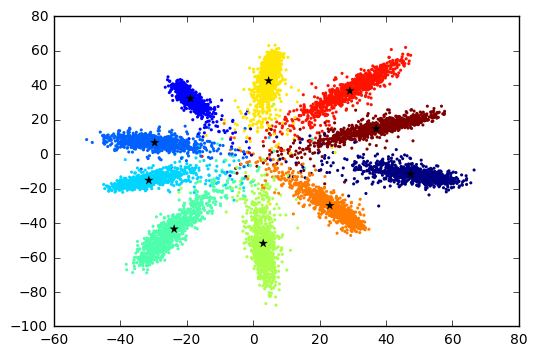

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(test_features[:,0],test_features[:,1],c=y_test,edgecolor="none",s=5)
plt.scatter(test_centers[:,0],test_centers[:,1],c="black",marker="*",edgecolor="none",s=50)
plt.show()